# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Знакомство с данными

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Посмотрим на датасет
df = pd.read_csv('/datasets/games.csv')
display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Стоит изменить тип в столбце *Year_of_Release* на *int* и в столбце *User_Score* на *float*, чтобы было проще анализировать оценки. 

Уникальные значения столбца Name:
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Количество вхождений каждого значения столбца Name
Need for Speed: Most Wanted              12
FIFA 14                                   9
Ratatouille                               9
Madden NFL 07                             9
LEGO Marvel Super Heroes                  9
                                         ..
Inazuma Eleven Strikers 2012 Xtreme       1
Fire Emblem: The Sacred Stones            1
Tokimeki Memorial: Private Collection     1
Domino Rally                              1
D.Gray-man: Sousha no Shikaku             1
Name: Name, Length: 11560, dtype: int64
Уникальные значения столбца Platform:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Количество вхождений каждо

Уникальные значения столбца User_Score:
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
Количество вхождений каждого значения столбца User_Score
NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.5       2
0.7       2
0.3       2
0         1
9.7       1
Name: User_Score, Length: 97, dtype: int64
Уникальные значения столбца Rating:
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
Количество вхождений каждого значения столбца Rating
NaN     6766
E       399

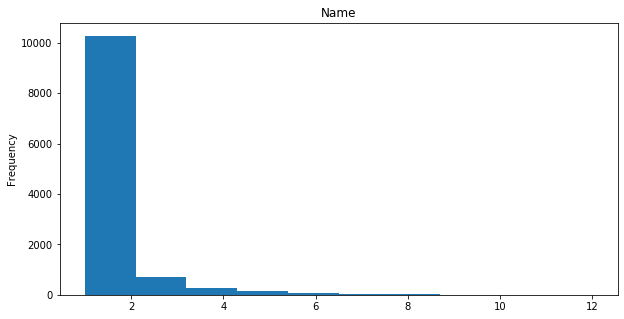

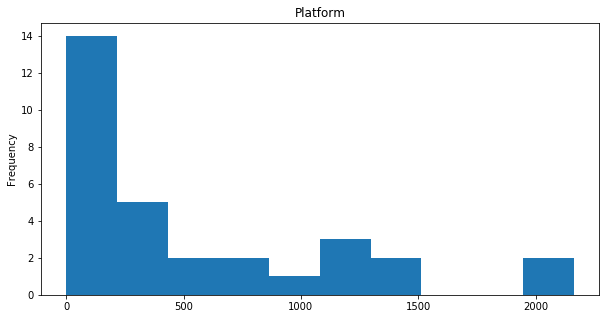

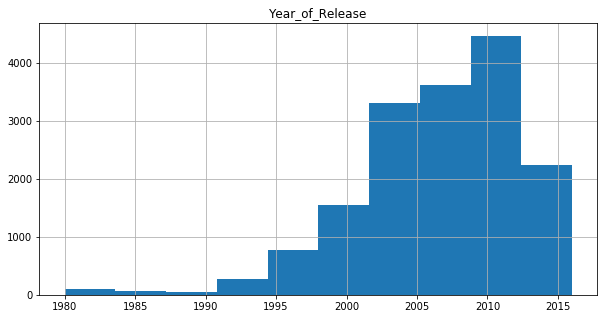

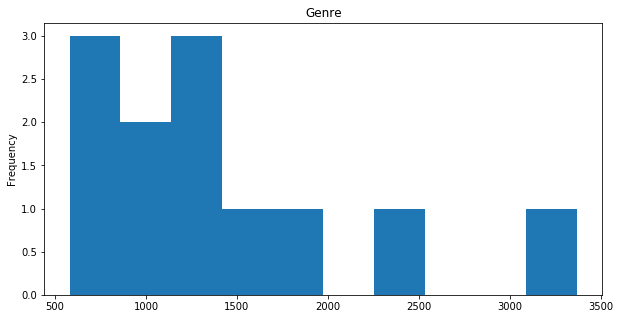

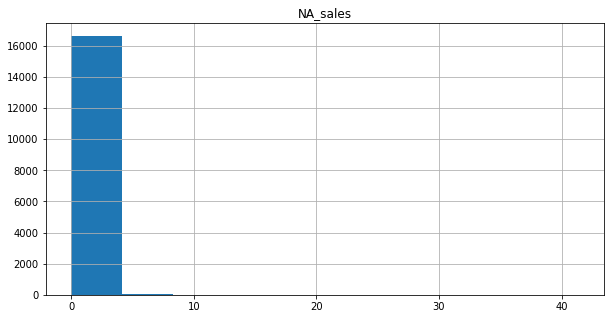

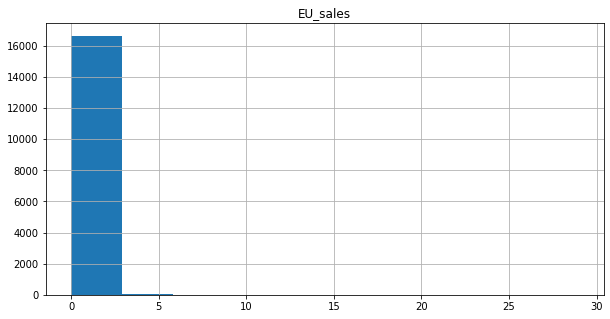

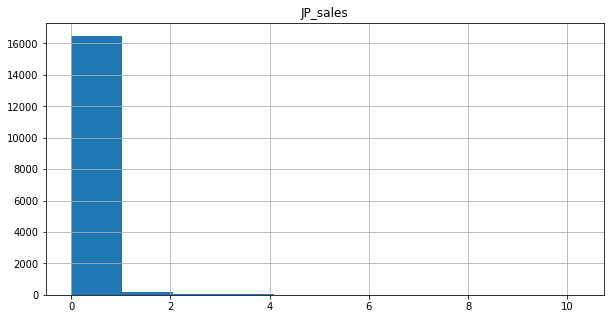

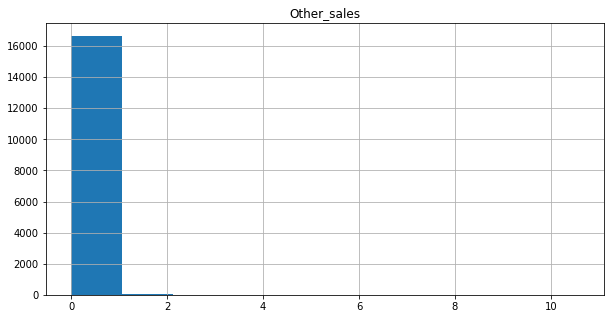

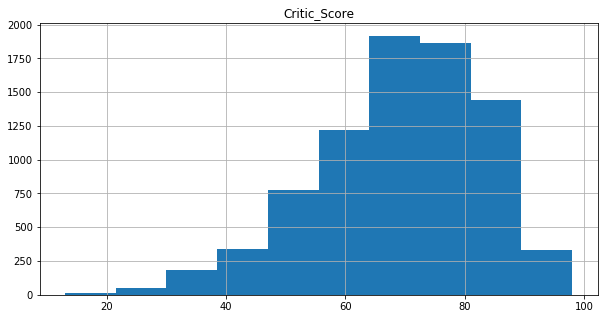

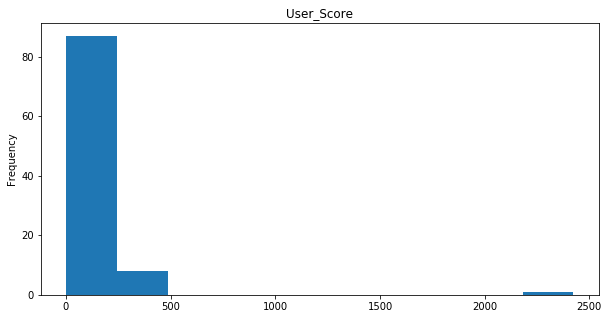

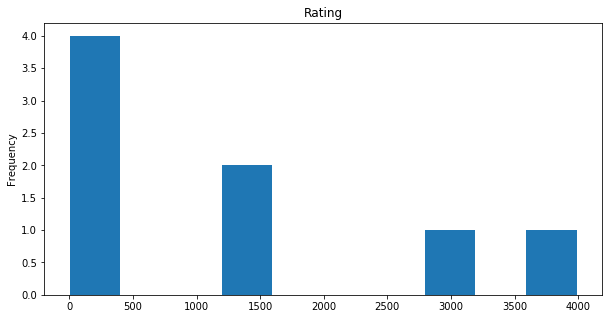

In [3]:
for col in df.columns:
    _, ax = plt.subplots(figsize=(10, 5))
    plt.title(col)
    print(f'Уникальные значения столбца {col}:')
    print(df[col].unique())
    print(f'Количество вхождений каждого значения столбца {col}')
    print(df[col].value_counts(dropna=False))
    print('===================================================================================================================')
    if (df[col].dtypes == 'float') | (df[col].dtypes == 'int'):
        df[col].hist(ax=ax)
    else:        
        df[col].value_counts().plot(ax=ax, kind='hist')        

**Выводы:**

Столбец *Name*: В таблице много игр, которые были 1, 2 или 3 платформах. При этом есть серии игр, которые были выпущены на 9 или даже на 12 платформах

Столбец *Platform*: Есть редкие, выбивающееся значения (2 очень популярные платформы), возможно их следует убрать из датасета

Столбец *Year_of_Release*: Имеются пропуски, возможно игры были настолько старыми, что не нашлось записей об их выходе. Распределение имеет тяжелый левый хвост.

Столбец *Genre*: Имеются пропуски. Возможно было тяжело определить конкретный жанр или попросту забыли его указать.

Столбец *NA_sales*: Присутствуют нулевые значения. Скорее всего такие игры не выпускали в Северной Америке. Сильно неравномерное распределение

Столбцец *EU_sales*:  Присутствуют нулевые значения. Скорее всего такие игры не выпускали в Европе. Сильно неравномерное распределение

Столбец *JP_sales*: Присутствуют нулевые значения. Скорее всего такие игры не выпускали в Японии. Сильно неравномерное распределение

Столбец *Critic_score*: Имеются пропуски, скорее всего эти игры были выпущены, когда статистика не велась и не было игровых критиков

Столбец *User_Score*: Имеются пропуски, скорее всего эти игры были выпущены, когда статистика не велась и не было игроки не ставили оценки. Присутсвует странное и частое значение *tbd*, возможно расшивровывется как *to be determined* и означает, что игра вышла, но еще не прошло достаточно времени, чтобы набрать статистику оценок или же попросту не хватает оценок игры. На распределении есть выброс, соотвесвующий количеству вхождений значения *tbd*.

Столбец *Rating*: Имеются пропуски. Возможно игры вышли, когда рейтинговое агенство отсутствовало, или агенство не смогло присвить рейтинг, или просто забыли вписать в базу. 

## Подготовка данных

### Изменение регистров

In [4]:
# Используем метод lower
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типов данных

Изменим тип *year_of_release* на *int*, потому что год выхода всегда целочислен. В столбце *user_score*  изменим на *float*, чтобы было проще анализировать оценки.

In [5]:
# Так как столбец year_of_release содержит пропуски конвертируем в тип Int64, который допускает наличие пропусков
df['year_of_release'] = df['year_of_release'].astype('Int64')

Предварительно разберемся со значением *tbd* в столбце *user_score*, его можно заменить на пропуски и затем заполнить.

In [6]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
# Изменим тип
df['user_score'] = df['user_score'].astype('float')

### Обработка пропусков

In [7]:
# Посмотрим какие столбцы содержат пропуски
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

**Столбецы *name* и *genre***

Пропусков всего два в каждом столбце из 16715 строк, поэтому их можно удалить.

In [8]:
df.dropna(axis=0, subset=['name', 'genre'], inplace=True)

**Столбец *year_of_release***

Так как консоли не вечны, и старым моделям приходят на смену новые, то пропуски можно заполнить средними значениями для каждой консоли. Напишем функцию, которая будет заполнять пропуски в одном столбце на основе группировки по другому столбцу

In [9]:
# На вход функция будет принимать датасет, столбец, где нужно заполнить пропуски (target), 
# и столбец, по которому будет идти группировка (pattern)
def fill_na(df, target, pattern):
    """
    На вход функция будет принимать датасет, столбец, где нужно заполнить пропуски (target), 
    и столбец, по которому будет идти группировка (pattern).     
    """
    values = df[pattern].unique()
    # Пройдемся в цикле по всем значениям столбца pattern
    for value in values:
            # В зависимости от тип данных в столбце target будем искать среднее или моду
        if (df[target].dtypes == 'float') or (df[target].dtypes == 'Int64') or (df[target].dtypes == 'int'):
            # Найдем среднее значение столбца target для каждой группы столбца pattern
            mean_value = round(df.loc[df[pattern] == value, target].mean())
        else:
            # Найдем моду столбца target для каждой группы столбца pattern
            mean_value = df.loc[df[pattern] == value, target].mode()[0]
        # Заполним пропуски
        df.loc[df[pattern] == value, target] = df.loc[df[pattern] == value, target].fillna(mean_value)
    return df

In [10]:
# Проведем заполнение пропусков на основе группировки по платформам
df = fill_na(df,'year_of_release', 'platform')

**Столбцы *critic_score* и *user_score***

При проставлении оценок игроки и критики могут быть предвзяты и субъективны, что не отражает действительной оценки игры. В последнее время есть множество примеров, когда игроки массово занижали оценки разным играм, потому что им не понравилось отсутвие родного языка, плоха оптимизация и т.д. В связи с этим пропуски в столбцах можно оставить, чтобы не портить статистику.

In [11]:
# # Заполним пропуски с оценками на основе группировки по жанру
# df = fill_na(df, 'critic_score', 'genre')
# df = fill_na(df, 'user_score', 'genre')

**Столбец *rating***

Не похоже, что пропуски случайны (их слишком много). Скорее всего пропуски в столбцах с рейтингом и оценками появились осознанно, возможно, что в год когда вышла игра никто не фиксировал рейтинги и не переносил в цифровой формат. 

In [12]:
# Заполним пропуски с оценками маркерное значение
df['rating'].fillna('no_rating', inplace=True)

In [13]:
# Проверка
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

### Добавление нового столбца

In [14]:
# Добавим новый столбец с суммарными продажами
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Обработка дубликатов

In [15]:
# Проверим есть ли дубликаты
df.duplicated().sum()

0

На первый взгляд повторов нет, но если изучить аббревиатуры рейтингов, то окажется, что рейтинги *E* и *K-A* означают одно и то же (рейтинг *E* заменил *K-A*). Для удобства заменим значения в столбце *rating*, кроме *RP*, так как оно означает, что рейтинг еще не присвоое. 

In [16]:
df.replace({'E':'>6', 'K-A':'>6', 'T':'>13', 'M':'>17', 'E10+':'>10', 'AO':'>18', 'EC':'>3'}, inplace=True)
# Проверка
df['rating'].unique()

array(['>6', 'no_rating', '>17', '>13', '>10', '>18', '>3', 'RP'],
      dtype=object)

## Исследовательский анализ данных

Посмотрим, сколько игр выпускались в разные годы

,count_of_games
year_of_release,
1980,9
1981,46
1982,53
1983,17
1984,14


[Text(0, 0.5, 'Количество игр'), Text(0.5, 0, 'Год выхода')]

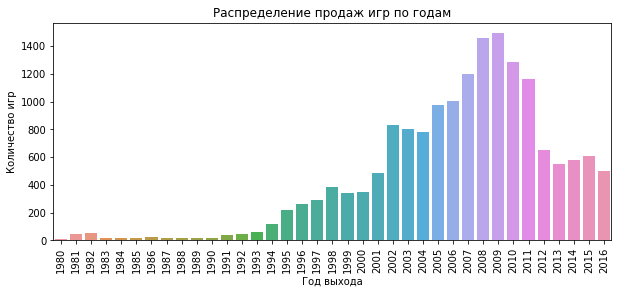

In [17]:
# Создадим сводную таблицу
sales_per_year = df.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
# Переименуем столбец
sales_per_year.columns = ['count_of_games']
display(sales_per_year.head())
# Простоим гистограмму
_, ax = plt.subplots(figsize=(10,4))
ax.tick_params(axis='x', rotation=90)
plt.title('Распределение продаж игр по годам')
sns.barplot(x=sales_per_year.index, y='count_of_games', data=sales_per_year, ax=ax)
ax.set(xlabel='Год выхода', ylabel='Количество игр')

**Вывод:** До 1995 игровая индустрия выпускала менее 200 игр в год. Игровой период до 1995 года можно отбросить, чтобы не учитывать статистические выбросы. К тому же индустрия значительно изменилась с 1980 года и не стоит планировать расходы на основе данных почти 40 летней давности. В 2008 и 2009 произошел игровой бум, когда выпускалось более 1400 игр в год.

Посмотрим, как менялись продажи по платформам

Text(0, 0.5, 'Суммарные продажи, млн. копий')

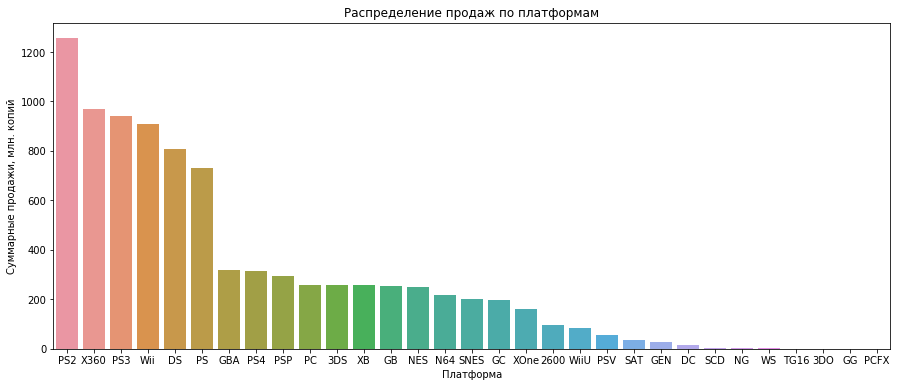

In [18]:
# Создадим сводную таблицу с суммарными продажами для каждой платформы
sales_per_platform = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum'
).sort_values('total_sales', ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(data=sales_per_platform, x=sales_per_platform.index, y='total_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')

Самыми популярными можно считать 6 консолей, так как после PS виден резкий спад популярности

Text(0, 0.5, 'Суммарные продажи, млн. копий')

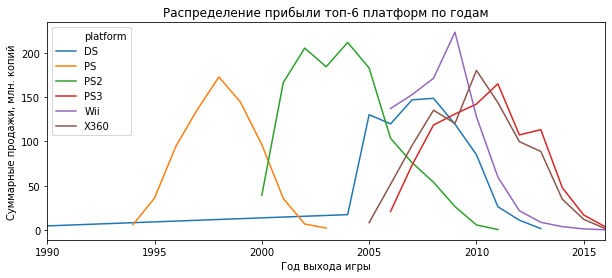

In [19]:
# Создадим список названий популярных платформ
top_list = sales_per_platform.head(6).index.to_list()
# Создадим новую таблицу, которая содержит только 6 популярных консолей
top_sales = df[df['platform'].isin(top_list)].pivot_table(
    index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum'
).reset_index().rename_axis(None, axis=1)
# Постоим линейны график изменения прибыли для каждой консоли
plt.figure(figsize=(10,4))
plt.xlim((1990, 2016))
sns.lineplot(data=top_sales, x='year_of_release', y='total_sales', hue='platform')
plt.title('Распределение прибыли топ-6 платформ по годам')
plt.xlabel('Год выхода игры')
plt.ylabel('Суммарные продажи, млн. копий')

**Выводы:** Наглядно сезонность выхода новых платформ можно оценить по консолям фирмы Playstation. В среднем новые консоли выходят каждые 5-6 лет. При этом в среднем консоли живут по 10 лет с пиком популярности в середине жизненного цикла. Спад популярности старых консолей вызван анонсом новых моделей. Возьмем за актуальный период время начиная с 2012, когда стабилизировались продажи игр

Посмотрим на прибыльность консолей начиная с 2012

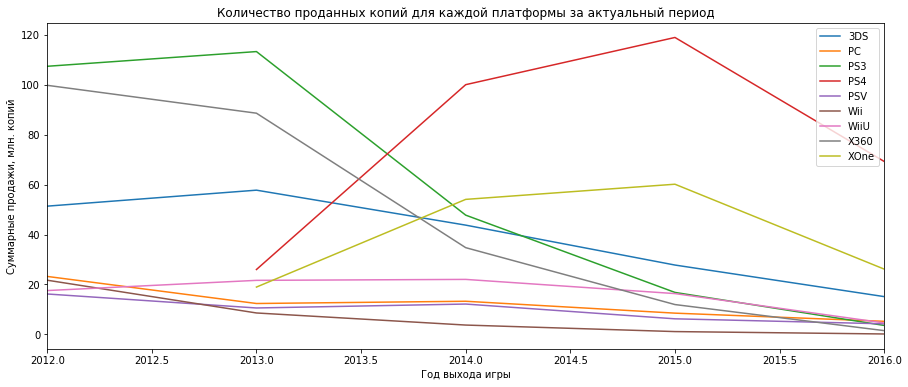

In [20]:
# Создадим сводную таблицу с данными от 2012 года
actual_period = df.loc[df['year_of_release'] >= 2012].pivot_table(
    index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum'
).reset_index().rename_axis(None, axis=1)
# Построим графики прибыли для актуального периода
_, ax = plt.subplots(figsize=(15,6))
# plt.title('Profit for the actual period')
for platform in actual_period['platform'].unique():
    # Условие необходимо, чтобы убрать платформы, которые перестали приносить прибыль к 2016 году
    if actual_period.loc[actual_period['platform']==platform , 'year_of_release'].max() == 2016:
         actual_period.loc[actual_period['platform']==platform].plot(x='year_of_release', y='total_sales', ax=ax, label=platform)
plt.legend()
plt.title('Количество проданных копий для каждой платформы за актуальный период')
plt.xlabel('Год выхода игры')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

**Вывод:** На момент составления прогноза (2016 год) больше всего прибыли приносили 3 платформы (PS4, XOne и 3DS). При этом для всех платформ наблюдался спад прибыли. К этому списку можно добавить PC и тогда у нас будут охвачены все игровые сегменты: портативные платформы (3DS), игровые домашние консоли (PS4, XOne) и компьютеры (PC). PC показывает низкие продажи или из-за непопулярности как игровой платформы (видимо большинство измпользуют компьютеры для работы), или из-за скачивания игроками игр с торрентов, которые не учитываются как продажи. 

Другие версии игровых приставок (PS3, X360, PSV, Wii и WiiU) можно убрать, так как их срок жизни подошел к концу (PS3, X360) или они не набрали популярности по всему миру (PSV, Wii и WiiU).

In [21]:
# Создадим датасет с актуальными данными для потенциально прибыльных платформ
top_list = ['3DS', 'PS4', 'XOne','PC']
actual_platforms = df.loc[(df['year_of_release'] >= 2012) & (df['platform'].isin(top_list))].reset_index()
actual_platforms.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
1,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
2,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,>17,12.62
3,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
4,62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,>6,9.90


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'Суммарные продажи, млн. копий')

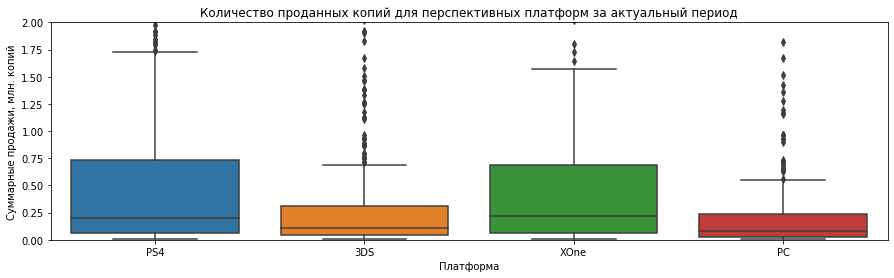

In [22]:
plt.figure(figsize=(15,4))
plt.ylim(top=2)
sns.boxplot(data=actual_platforms, x='platform', y='total_sales')
plt.title('Количество проданных копий для перспективных платформ за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')

**Выводы:** Графики для *PS4* и *XOne* очень похожи и в среднем приносят больше продаж игр (почти 0.25 млн копий). В целом игры, которые набрали более 1,75 млн. копий, являются выбросами и своего рода бестселлерами на платформах *PS4* и *XOne*. При этом продажи для 3DS в среднем были чуть ниже и был меньше разброс. Игры для платформа *3DS* можно считать бестселлерами при более скромных показателях (начиная с 0,75 мнл. проданных копий). Меньше всего приносил PC с наименьшим разбросом продаж для компьютеров игра считается выдающейся, если она продалась в тираже больше 0,5 млн. копий. 

Посмотрим, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков

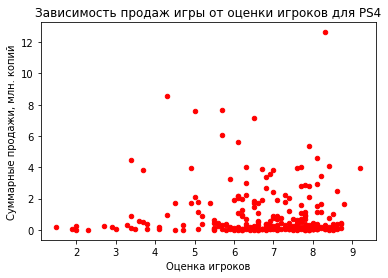

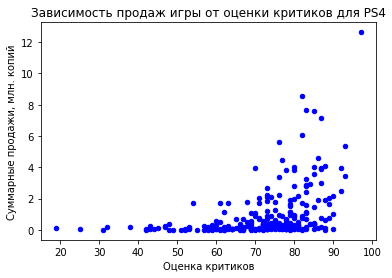

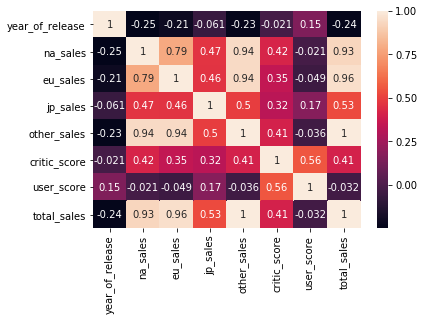

In [23]:
# Построим диаграммы рассеяния в зависимости от отзывово критиков и игроков
df.loc[(df['platform'] == 'PS4') & (df['year_of_release'] >= 2012)].plot(
    x='user_score', y='total_sales',kind='scatter',color='r', title='Users_influence'
)
plt.title('Зависимость продаж игры от оценки игроков для PS4')
plt.xlabel('Оценка игроков')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()
df.loc[(df['platform'] == 'PS4') & (df['year_of_release'] >= 2012)].plot(
    x='critic_score', y='total_sales', kind='scatter',color='b', title='Critics_influence'
)
plt.title('Зависимость продаж игры от оценки критиков для PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()
# Посчитаем кореляцию
sns.heatmap(df.loc[(df['platform'] == 'PS4') & (df['year_of_release'] >= 2012)].corr(), annot=True)

На продажи игр на PS4 критики оказывали куда большее влияние, чем игроки. Они вообще негативно влияли на продажи.

Сравним данные для других платформ

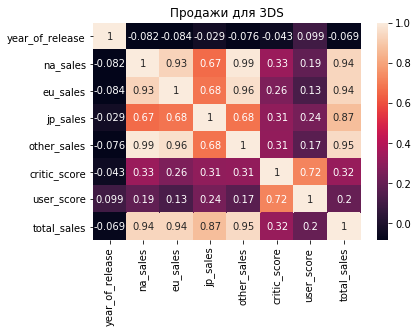

Влияние критиков на продажи для 3DS:0.323 
Влияние игроков на продажи для 3DS:0.204 


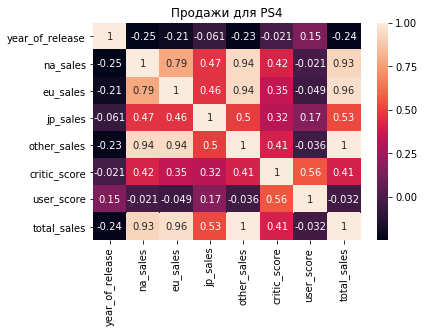

Влияние критиков на продажи для PS4:0.407 
Влияние игроков на продажи для PS4:-0.032 


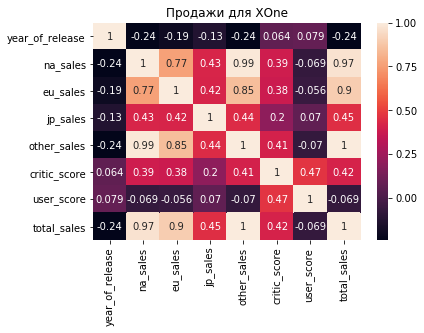

Влияние критиков на продажи для XOne:0.417 
Влияние игроков на продажи для XOne:-0.069 


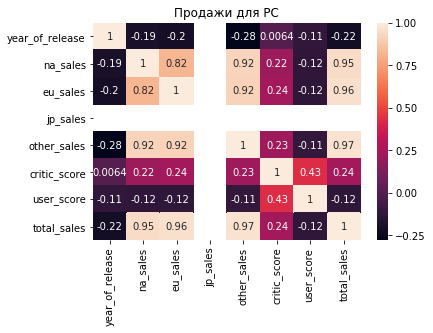

Влияние критиков на продажи для PC:0.237 
Влияние игроков на продажи для PC:-0.122 


In [24]:
for platform in top_list:
    corr = df.loc[(df['platform'] == platform) & (df['year_of_release'] >= 2012)].corr()
    plt.title(f'Продажи для {platform}')
    sns.heatmap(corr, annot=True)
    plt.show()
    print(f"Влияние критиков на продажи для {platform}:{corr.loc['critic_score','total_sales']:.3f} ")
    print(f"Влияние игроков на продажи для {platform}:{corr.loc['user_score','total_sales']:.3f} ")

**Выводы:** Для всех потенциальных платформ критики оказывали больше влияния на продажи, чем игроки. В это легко поверить, потому что людям при выборе игры легче доверится экспертному мнению, чем мнению незнакомых, неопытных людей. Интересно, что в Японии не купили ни одной игры для PC за рассматриваемый период

Посмотрим на общее распределение игр по жанрам

Text(0, 0.5, 'Количество игр')

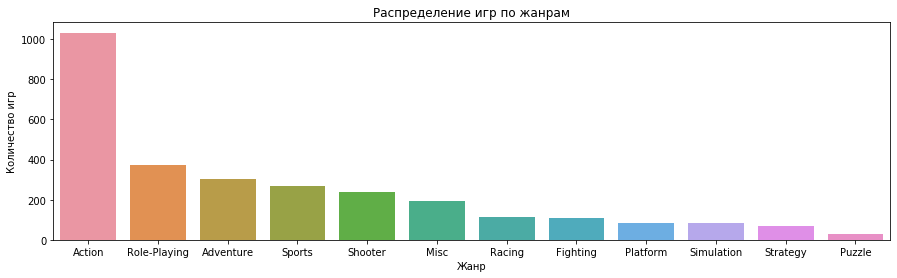

In [25]:
actual = df.loc[df['year_of_release'] >= 2012]
plt.figure(figsize=(15,4))
sns.countplot(data=actual, x='genre', order = actual['genre'].value_counts().index)
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')

**Вывод:** Абсолютным лидером являлись игры в жанре *Action*, затем шли жанры *Role-Playing*,*Adventure*, *Sports*,  *Shooter* и *Misc*. Абсолютным аутсайдером являлись пазлы.

Посмоторим на распределение прибыли по жанрам.

Text(0, 0.5, 'Количество проданных копий, млн.')

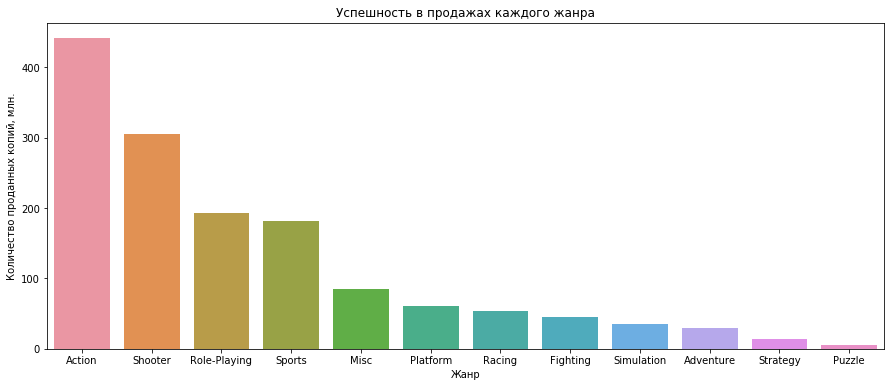

In [26]:
top_genres = actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(data=top_genres, x=top_genres.index, y='total_sales')
plt.title('Успешность в продажах каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн.')

**Выводы:** 4 жанра из топ-5 самых популярных совпадают. Выбивается жанр *Shooter*, которые занял место *Adventures*. Концы списков похожи. Для большинства жанров выполняется закономерность: чем популярнее жанр, тем он продаваемее. Различия в порядке жанров отсортированных по популярности и прибыли могут быть вызваны тем, что стоимость продажи жанров с разными позициями в списках отличаются от стоимости продажи их соседей.

Посмотрим на среднюю продаваемость игр для каждого жанра

Text(0, 0.5, 'Количество проданных копий, млн.')

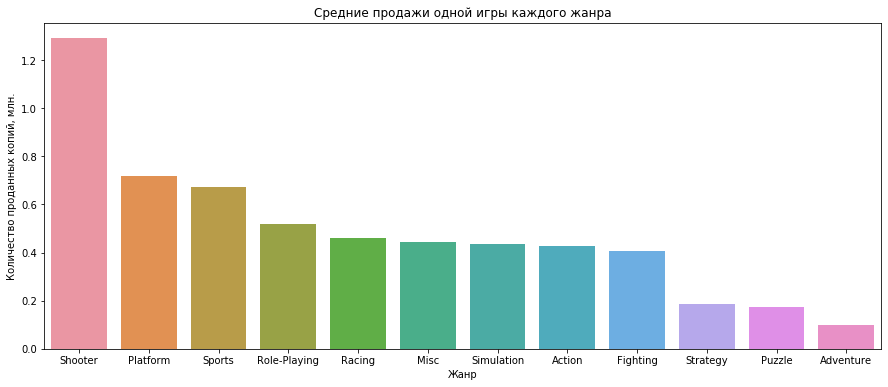

In [27]:
top_genres = actual.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values('total_sales', ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(data=top_genres, x=top_genres.index, y='total_sales')
plt.title('Средние продажи одной игры каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн.')

**Вывод:** Сравнив графики средних продаж и суммарных, можно сказать, сами по себе шутеры продаваемее. Однако экшен-игр выходят в разы больше, что делает их наиболее продаваемыми.

## Составим портрет пользователя каждого региона

Определим рейтинги популярности платформ, жанров и рейтингов для каждого региона

In [28]:
# Напишем функцию
def get_popularity_rating(df, target):
    """
    target - столбец по которому мы хотим построить рейтинг
    """
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    regions_df = df.pivot_table(index=target, values=regions, aggfunc='sum').reset_index().rename_axis(None, axis=1)
    for region in regions:
        regions_df
        regions_df.sort_values(region,ascending=False, inplace=True)
        plt.figure(figsize=(12,4))
        plt.title(f"Рейтинг популярности {target} в {region.split('_')[0].upper()}")
        sns.barplot(data=regions_df.head(5), x=target, y=region)
        plt.show()

Построим популярность платформ по регионам.

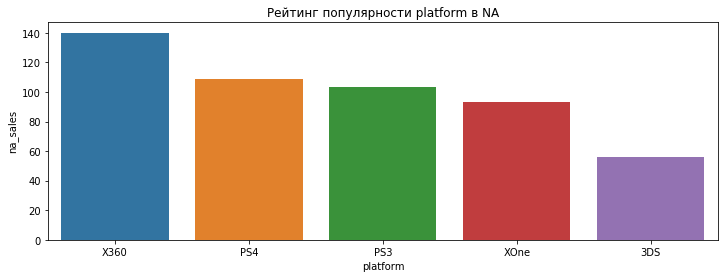

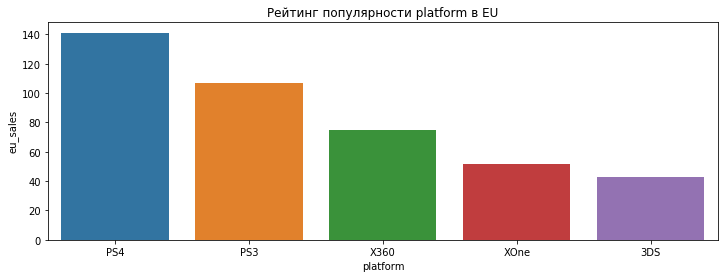

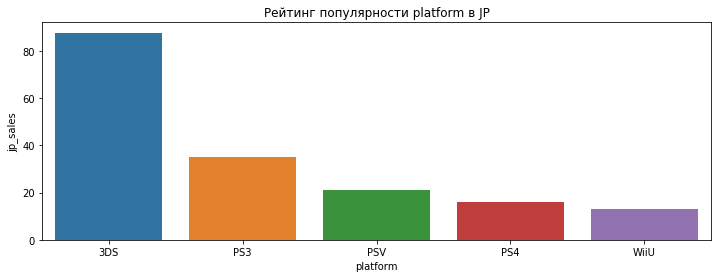

In [29]:
get_popularity_rating(actual, 'platform')

**Вывод:** Список популярных платформ для Европы и Америки схожи, не считая того, что в Европе лидирует *PS4*, а в Америке *X360* (видимо они поддерживают родного производителя). В Японии совершенно иная ситуация, в рейтинге присутсвуют платформы только Японских компаний причем лидер - портативная консоль, видимо Японцы не прочь поиграть по пути на работу в метро. 

Построим популярность жанров по регионам.

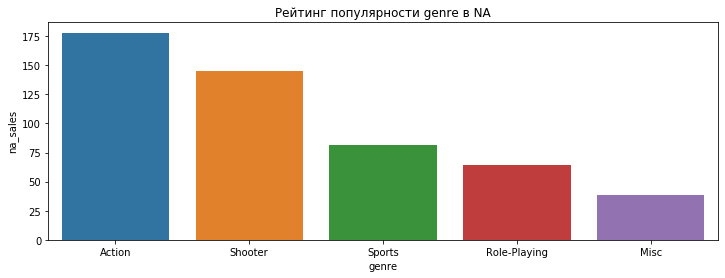

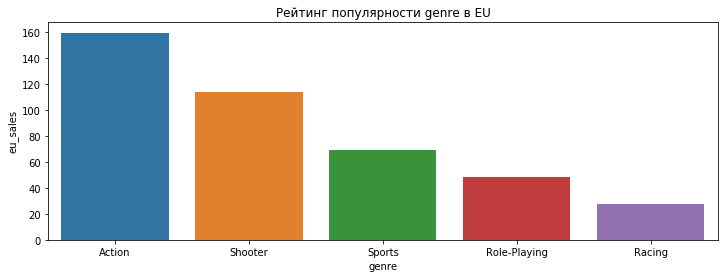

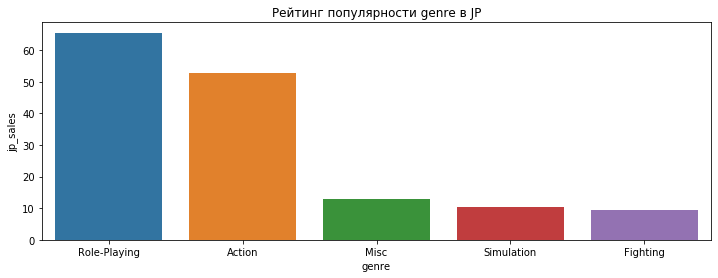

In [30]:
get_popularity_rating(actual, 'genre')

**Выводы:** США и Европа предпочитают одинаковые жанры, с единственным отличием Американцы предпочитают *Misc* игры гоночным симуляторам, как принято в Европе. В Японии снова полностью иная ситуация, Японцы тоже любят жанры *Action* и *Misc**, но не в такой степени как Американцы и жители Европы. В стране восходящего солнца ,больше всего пользуются популярностью ролевые игры и замыкают топ-5 файтинги.

Построим популярность рейтингов по регионам.

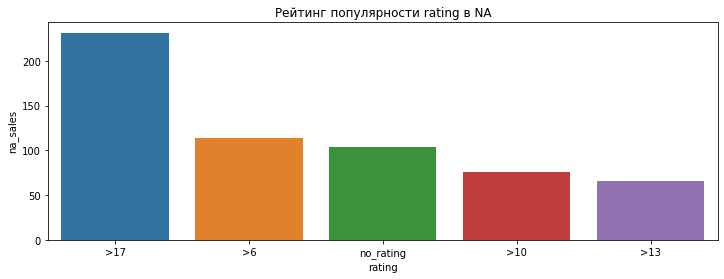

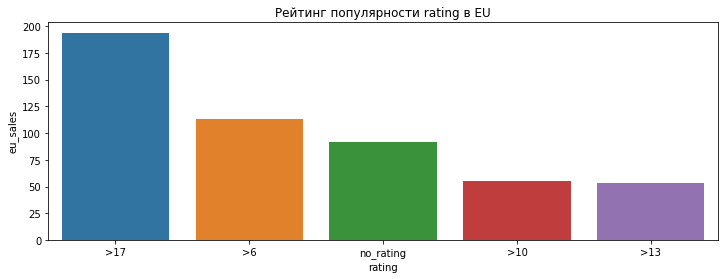

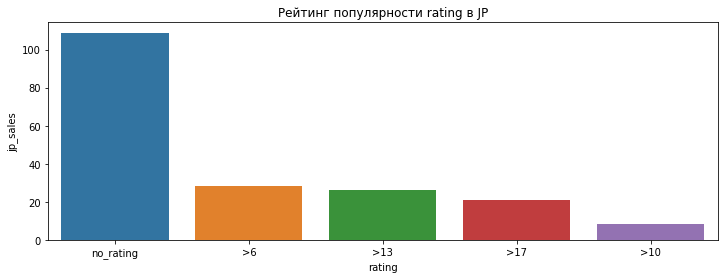

In [31]:
get_popularity_rating(actual, 'rating')

**Выводы:** И снова Америка и Европа показывают схожие тенденции, и там и там популярны игры для детей от 17 лет и присутствуют игры без рейтинга в достаточно большем объеме. В Японии ситуация снова отличается, первое место занимают игры без рейтинга, дальше с большим отрывом идут игры от 6 и 13 лет. Менее популряны игры от 17 и 10 лет. 

Присутсвие игр без рейтинга в большем объеме можно объяснить следующими причинами:
 1. Работники магазина не любят заносить возрастной рейтинг в базу
 2. Рейтинговая компания не поспевает обрабатывать все запросы
 3. Не всех разработчиков заботит какой рейтинг у их игры , и поэтому не отправляют в агенство игры на оценку
 4. Игре присвоила рейтинг другая компания
 5. Компания не смогла присвоить рейтинг

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сравним нулевую гипотезу:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Против альтернативной гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC Не равны

Для сравнение используем величину достигаемого уровня значимости p-value, которая показывает вероятность получить значение случайной величины более экстремальное, чем выбранное значение статистики при условии, что нулевая гипотеза верна.

In [32]:
actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [33]:
# Создадим выборки с нужными значениями
pc_user_score = actual.loc[actual['platform'] == 'PC', 'user_score'].dropna()
xone_user_score = actual.loc[actual['platform'] == 'XOne', 'user_score'].dropna()
# Пороговый уровень значимости
alpha = 0.05
results = st.ttest_ind(pc_user_score,xone_user_score)
print(f"Достигаемый уровень значимости: {results.pvalue}")
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Пользовательские рейтинги платформ Xbox One и PC не равны')
else:
    print('Не отвергаем нулевую гипотезу. Пользовательские рейтинги платформ Xbox One и PC считаем одинаковыми')

Достигаемый уровень значимости: 0.5535080500643661
Не отвергаем нулевую гипотезу. Пользовательские рейтинги платформ Xbox One и PC считаем одинаковыми


**Вывод:** Не отвергаем нулевую гипотезу. Значит вероятность получить одинаковые рейтинги для двух платформ сравнительно высока.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Сравним нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Против альтернативной гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные

Для сравнение используем величину достигаемого уровня значимости p-value, которая показывает вероятность получить значение случайной величины более экстремальное, чем выбранное значение статистики при условии, что нулевая гипотеза верна.

In [34]:
# Создадим выборки с нужными значениями
action_user_score = actual.loc[actual['genre'] == 'Action', 'user_score'].dropna()
sports_user_score = actual.loc[actual['genre'] == 'Sports', 'user_score'].dropna()
# Пороговый уровень значимости
alpha = 0.05
results = st.ttest_ind(action_user_score, sports_user_score)
print(f"Достигаемый уровень значимости: {results.pvalue}")
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Не отвергаем нулевую гипотезу. Пользовательские рейтинги жанров Action и Sports считаем одинаковыми')

Достигаемый уровень значимости: 3.517102771333629e-26
Отвергаем нулевую гипотезу. Пользовательские рейтинги жанров Action и Sports разные


**Вывод:** Отвергаем нулевую гипотезу. Значит вероятность получить одинаковые рейтинги для двух жанров мала.

## Общий вывод

В процессе выполнения проекты были отработаны и применены различные методы предобработки данных, были обработаны пропуски и дубликаты, преобразованы существующие данные и добавлены новые.

По выполнении проекты были получены следующие выводы:
- Активные рост игровой индустрии начался в 1995, когда начали выпускать более 200 игр в год. В 2008 и 2009 наблюдались пики с примерно 1400 играми в год;
- За весь собранные период наиболее популярные платформы - *PS2*, *X360*, *PS3*, *Wii* ,*DS* и *PS*.
- Согласно анализу популярных консолей срок жизни в среднем 10 лет, а новые консоли появляются каждые 5 лет
- По столбчатой диаграмме продаж видно, что после 2012 зависимость более-менее стабильна, поэтому для разработки стратегии на 2017, стоит анализировать данные с 2012 года;
- 2016 является одним из переходных лет, когда старое поколение консолей находится на минимуме популярности, а платформы нового поколения только появились и еще не набрали популярность;
- К потенциальным платформам можно отнести портативную консоль *3DS*, игровые домашние консоли *PS4* и *XOne* (наравне друг с другом приносят больше продаж), а также стоит уделить внимание компьютерам, но в меньшей мере. *PC* стоит оставить, чтобы полностью охватить весь рынок платформ, но так как *PC* стабильно приносит небольшую прибыль по сравнению с другими, то не стоит закупать слишком много игр на продажу для *PC*;
- Для всех перспективных платформ оценки критиков оказывали большее влияние на объемы продаж, чем пользовательские;
- По миру самым популярным жанром является *Action* и самым прибыльным тоже. В целом чем популярнее жанр, тем больше продаж. Выбиваются жанры *Shooter* и *Adventures*. Различия в порядке жанров отсортированных по популярности и прибыли могут быть вызваны тем, что стоимость продажи жанров с разными позициями в списках отличаются от стоимости продажи их соседей. При этом в среднем одна игра жанра шутер продается минимум в 1,5 раза лучше других жанров;
- Что касается количества продаваемых консолей, то США и Европа идут нога в ногу, а за ними Япония;
- Касательно региональных особенностей, то в США и Европе схожие тенденции: популярность жанра *Action*, игр для детей от 17 лет. Единственное различие - платформы, в США предпочитают *X360*, в Европе - *PS4*. В Японии ситуация координально отличается: самым популярный жанр - *Role-playing*, популярные игры имеет рейтинг от 13 или от 6 лет, в качестве игровых платформ используют консоли от Японских компаний *Playstation* и *Nintendo*;
- После проверки гипотез можно сказать, что пользовательские рейтинги платформ Xbox One и PC равны и пользовательские рейтинги жанров Action и Sports разные.

На основе полученных выводов можно сделать следующие предположения касательно планов на 2017 год:

 - 2017 также приходится на период смены поколений платформ. В связи с этим следует переходить на продажу игр для консолей нового поколения, но при этом в меньшей мере закупать игры для консолей старого поколения (потому что их срок  жизни еще не подошел к концу и они могут принести прибыль) и компьютеров (чтобы охватить весь рынок и они приносят низкую, но стабильную прибыль);
 - Именно на основе оценок критиков, а не игроков предсказывать какие игры будут покупаться чаще и ,соответсвенно, планировать объемы закупок;
 - Можно сделать для Японии отдельный сайт или направлять им другую рекламу игр. Не стоит рекламировать игры на *X360* и *XOne* в японии, так как американские консоли не популярны. Для Японии помимо акцентирования внимания на игры для платформ компании *Playsation*, также стоит рекламировать консоли *Nintendo*. Что касается жанров, то для Японии в больших объемах следует закупать игры жанра *Role-playing* и игры без рейтинга. Для Америки и Европы сайты и рекламу можно оставить одинаковыми. Для этих регионов стоит закупать побольше *Action* игр и игр для детей от 17 лет.